In [4]:
import numpy as np
from nltk.tree import Tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from iparse import IParser

In [5]:
iparse = IParser("../models/gpn_tau_i2_back_ce_c1_linear_layer_7881782_dev=94.41.pt")

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
tree2, cats = iparse.parse_sentence("Competition from other steamship lines has cut Cunard's share of sea passengers from one-third to one-fourth and this year the line showed a marked drop of profits on the Atlantic run")
print(cats)
display(tree2)

In [7]:
def show_tree_and_pred(sent):
    tree2, cats = iparse.parse_sentence(sent)
    display(tree2)
    print(cats)
    tags = iparse.tree_to_tag(tree2)
    print(tags)
    display(iparse.tree_from_cats(tags))

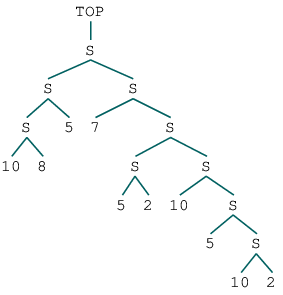

In [8]:
iparse.tree_from_cats([8, 10, 8, 5, 7, 5, 2, 10, 5, 10, 2, 8])

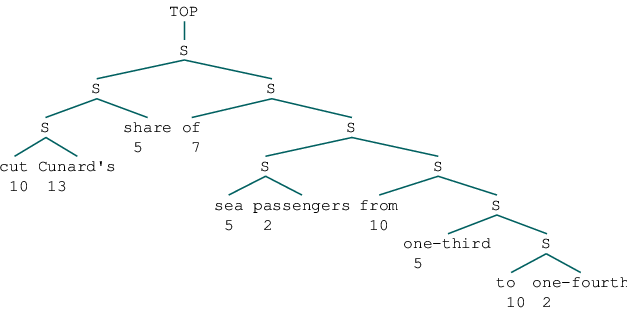

[8, 10, 13, 5, 7, 5, 2, 10, 5, 10, 2, 8]
[ 8  2  8  5  7 15  2 10 10  8  8  8]


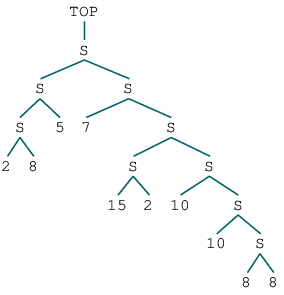

In [9]:
show_tree_and_pred("cut Cunard's share of sea passengers from one-third to one-fourth")

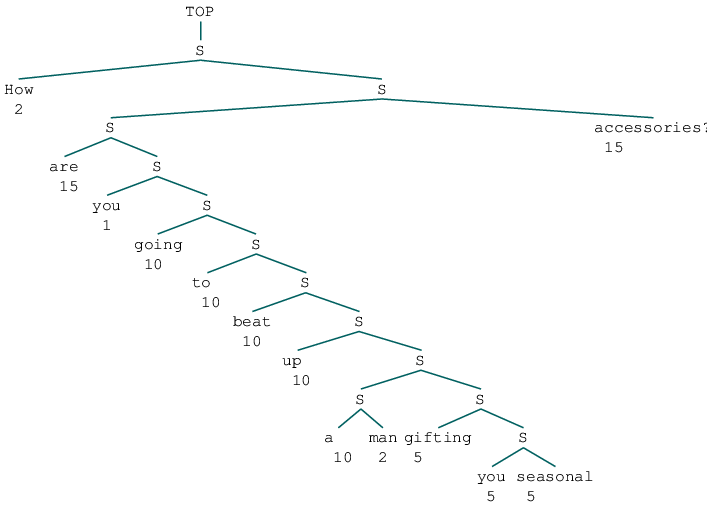

[7, 2, 15, 1, 10, 10, 10, 10, 10, 2, 5, 5, 5, 15, 7]
[ 7  2  7 10 10 10 10 10 10  2  5  5  2 15 15]


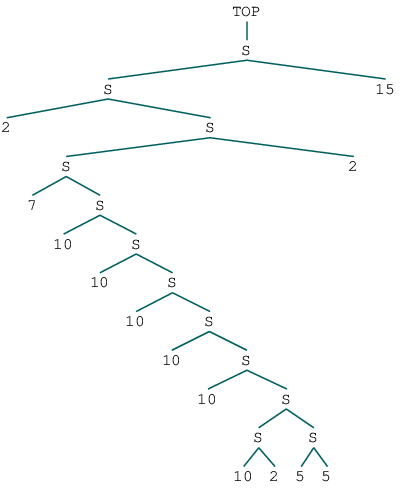

In [8]:
show_tree_and_pred("How are you going to beat up a man gifting you seasonal accessories?")

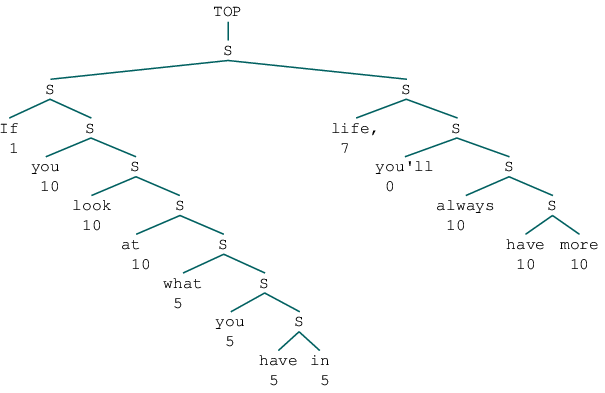

[8, 1, 10, 10, 10, 5, 5, 5, 5, 7, 0, 10, 10, 10, 8]
[ 5  2  7 15 10 10 10 10  2  7  7 15  0 14  5]


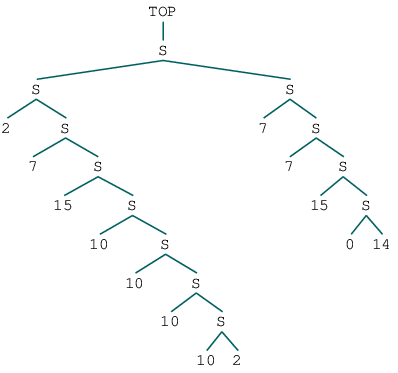

In [46]:
show_tree_and_pred("If you look at what you have in life, you'll always have more")

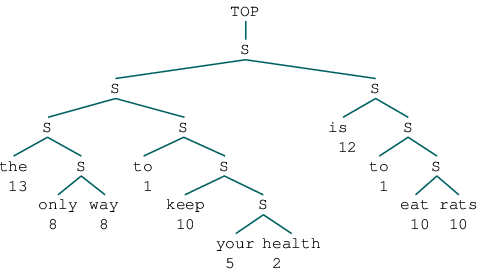

[8, 13, 8, 8, 1, 10, 5, 2, 12, 1, 10, 10, 8]
[ 5  2  8  8  0  1 10  2  7  7  8 14  5]


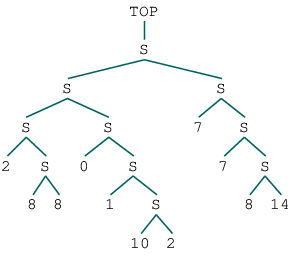

In [50]:
show_tree_and_pred("the only way to keep your health is to eat rats")

['in', 'relation', 'to', 'Laos', ',', 'Algeria', ',', 'South', 'Africa', ';', ';'] 11
13


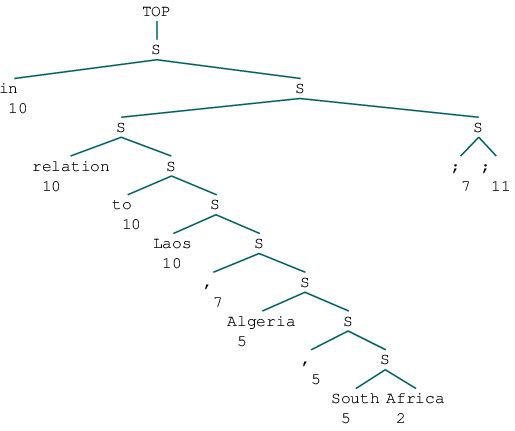

[11, 10, 10, 10, 10, 7, 5, 5, 5, 2, 7, 11, 11]

['The', 'speaker', 'suggested', 'that', 'the', 'desolation', 'of', 'a', 'post-attack', 'world', 'would', 'be', 'too', 'awful', 'to', 'face', '.'] 17
18


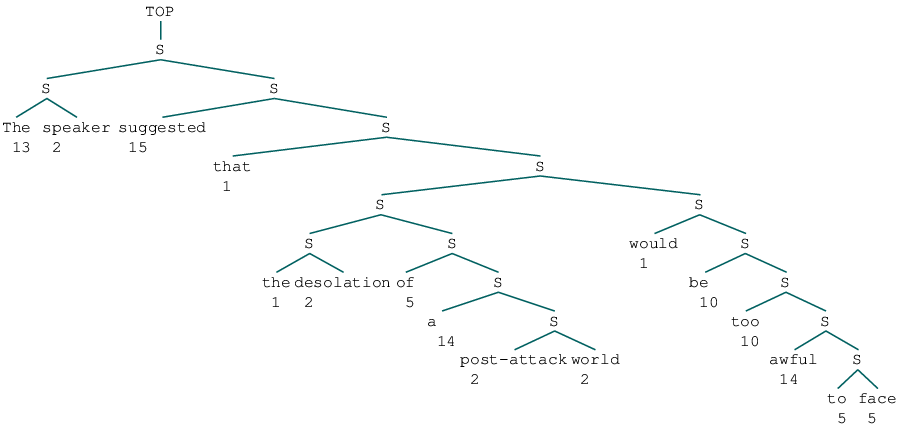

[8, 13, 2, 15, 1, 1, 2, 5, 14, 2, 2, 1, 10, 10, 14, 5, 5, 8]

['The', 'materials', 'for', 'compromise', 'are', 'at', 'hand', ':', 'The', 'Nation', ',', 'Walter', 'Lippmann', 'and', 'other', 'sober', 'commentators', '(', 'see', 'Alan', 'Clark', 'on', 'p.', '367', ')', 'have', 'spelled', 'them', 'out', 'again', 'and', 'again', '.'] 33
34


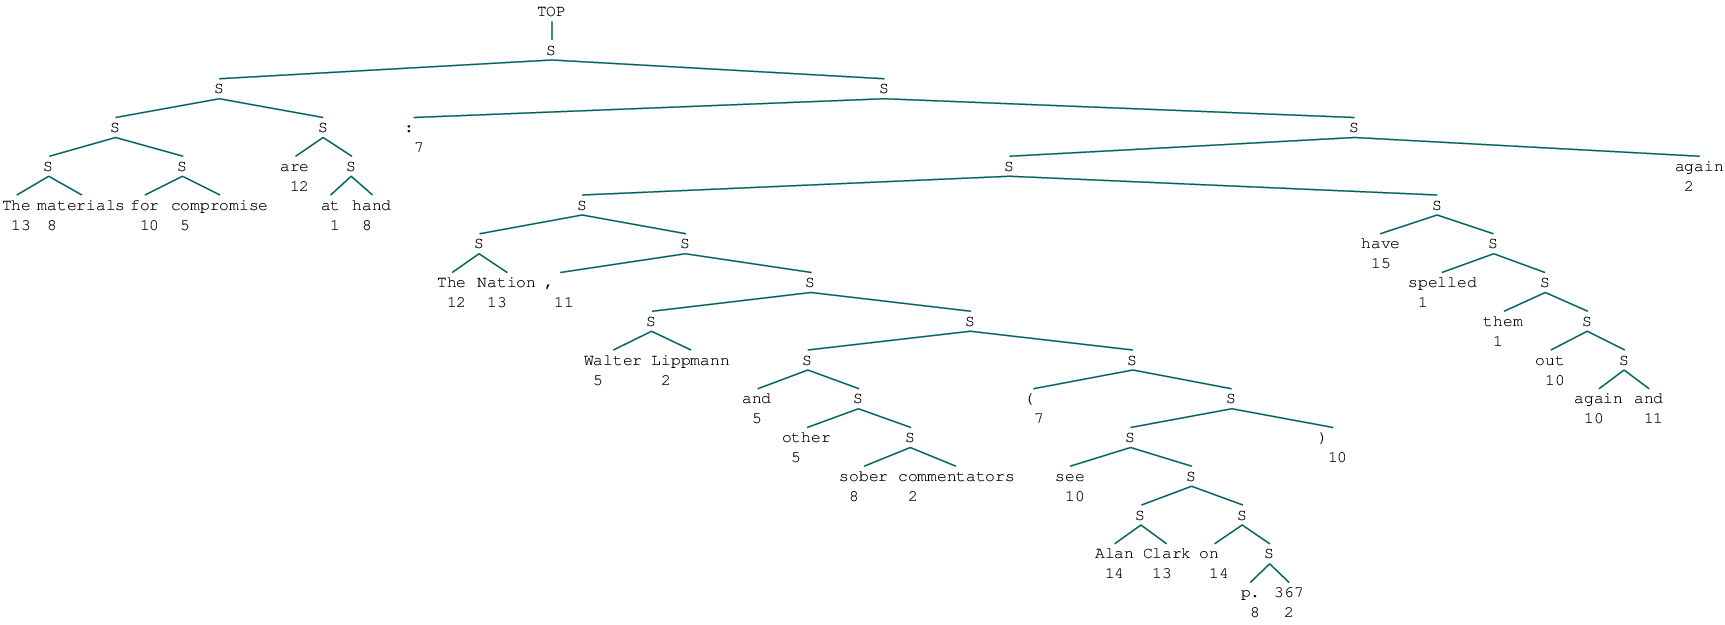

[6, 13, 8, 10, 5, 12, 1, 8, 7, 12, 13, 11, 5, 2, 5, 5, 8, 2, 7, 10, 14, 13, 14, 8, 2, 10, 15, 1, 1, 10, 10, 11, 2, 6]

['Or', "that's", 'what', 'it', 'looked', 'like', 'at', 'the', 'time', '.'] 10
11


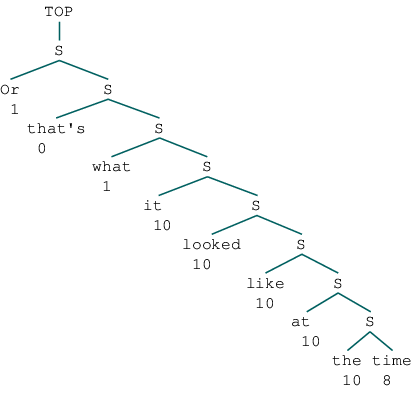

[8, 1, 0, 1, 10, 10, 10, 10, 10, 8, 8]



In [9]:
from nltk.corpus import brown
brown_sents = brown.sents(categories=['editorial', 'reviews'])
size_brown = len(brown_sents)

for i in np.random.randint(size_brown, size=4):
    sent = brown_sents[i]
    print(sent, len(sent))
    tree, categories = iparse.parse_sentence(sent)
    print(len(categories))
#     for i, leafPos in enumerate(tree.treepositions('leaves')):
#         tree[leafPos] = categories[i+1]
    display(tree)
    print(categories, end='\n\n')

In [ ]:
from nltk.corpus import brown
brown_sents = brown.sents(categories=['editorial', 'reviews'])

counts = np.zeros(16)
print(len(brown_sents))
for sent in brown_sents: 
    try:
        tree, cats = iparse.parse_sentence(sent)
        cats = cats[1:-1]
        for c in cats:
            counts[c] += 1
    except:
        print(' '.join(sent))


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = list(range(16))
ax.bar(langs,counts)
plt.show()